In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("Dataset/train.csv")
test=pd.read_csv("Dataset/test.csv")
submit=pd.read_csv("Dataset/sample_submission.csv")

In [3]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [4]:
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [5]:
train.NObeyesdad.nunique()

7

In [6]:
train.NObeyesdad.unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder=LabelEncoder()
train["NObeyesdad_Encoder"]=encoder.fit_transform(train["NObeyesdad"])
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  \
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II   
1  1.000000         no             Automobile        Normal_Weight   
2  1.673584         no  Public_Transportation  Insufficient_Weight   
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III   
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II   

   NObeyesdad_Encoder  
0                   6  
1                   1  
2                   0  
3                   4  
4                   6

In [9]:
train.groupby("NObeyesdad_Encoder")["SMOKE"].count()

NObeyesdad_Encoder
0    2523
1    3082
2    2910
3    3248
4    4046
5    2427
6    2522
Name: SMOKE, dtype: int64

In [10]:
train["CALC"].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

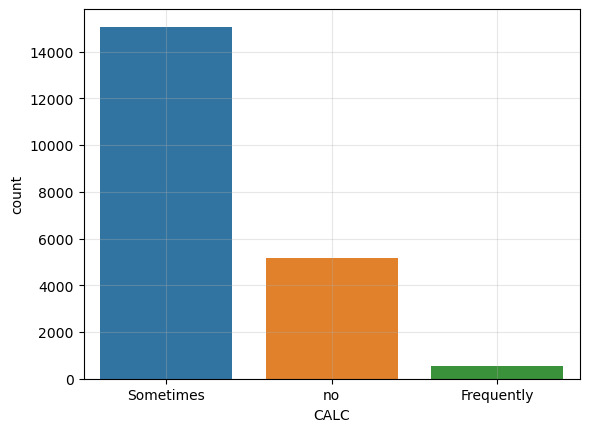

In [11]:
sns.countplot(x="CALC",data=train)
plt.grid(alpha=0.3)

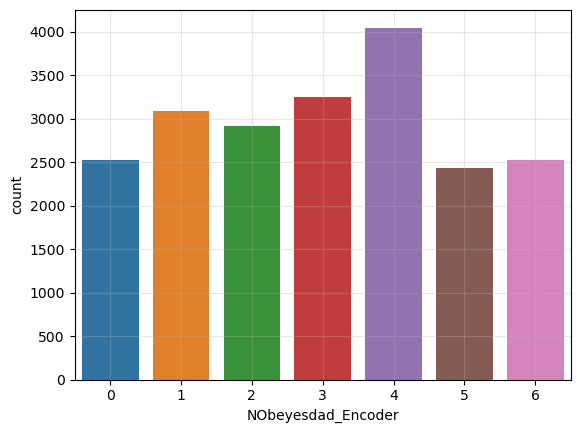

In [12]:
sns.countplot(x="NObeyesdad_Encoder",data=train)
plt.grid(alpha=0.3)

In [13]:
train.groupby("NObeyesdad_Encoder")["CALC"].count()

NObeyesdad_Encoder
0    2523
1    3082
2    2910
3    3248
4    4046
5    2427
6    2522
Name: CALC, dtype: int64

In [14]:
train.groupby("Age")["NObeyesdad_Encoder"].count().to_frame()

NObeyesdad_Encoder
Age                          
14.000000                   5
15.000000                   3
16.000000                 109
16.093234                   4
16.120699                   1
...                       ...
55.246250                   2
55.272573                   1
55.493687                   1
56.000000                   1
61.000000                   2

[1703 rows x 1 columns]

In [15]:
category_order=['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight','Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I']

<Axes: xlabel='Gender', ylabel='count'>

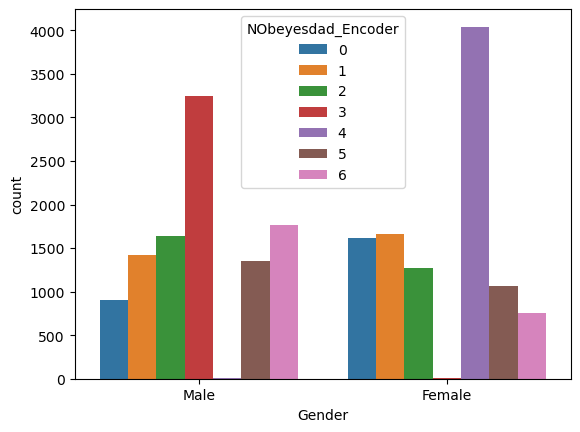

In [16]:
sns.countplot(x="Gender",hue="NObeyesdad_Encoder",data=train)

<Axes: xlabel='Height', ylabel='Weight'>

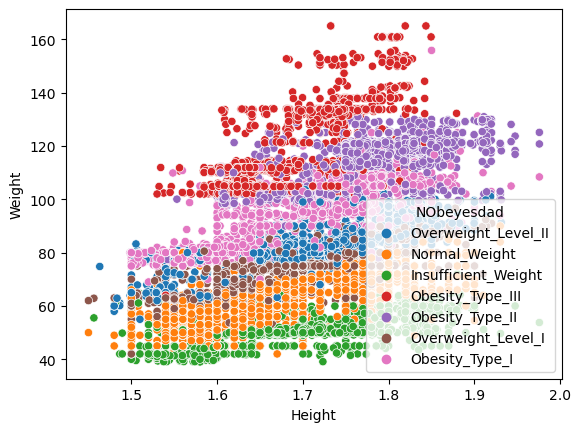

In [17]:
sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=train)

<Axes: xlabel='Age', ylabel='Gender'>

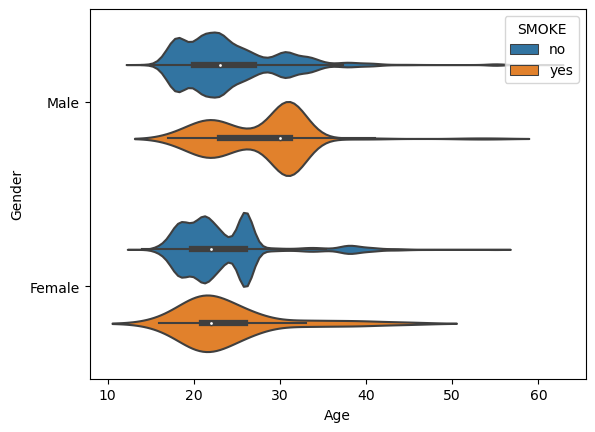

In [18]:
sns.violinplot(data=train, x='Age', y='Gender', hue='SMOKE')

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

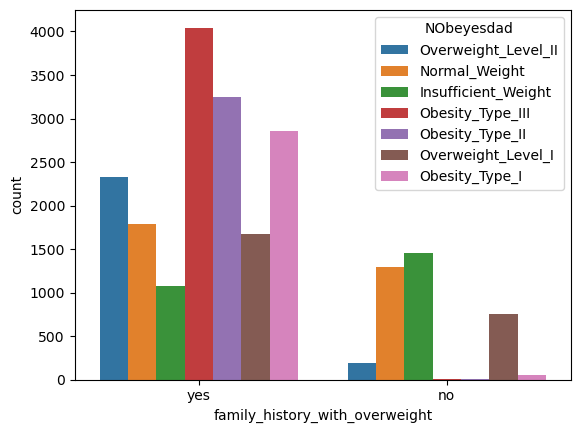

In [19]:
sns.countplot(x=train["family_history_with_overweight"],hue="NObeyesdad",data=train,hue_order=category_order)

In [20]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
NObeyesdad_Encoder                0
dtype: int64

In [21]:
train.head(2)

id  Gender        Age    Height    Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998  81.66995                            yes   
1   1  Female  18.000000  1.560000  57.00000                            yes   

  FAVC  FCVC       NCP        CAEC SMOKE      CH2O SCC  FAF       TUE  \
0  yes   2.0  2.983297   Sometimes    no  2.763573  no  0.0  0.976473   
1  yes   2.0  3.000000  Frequently    no  2.000000  no  1.0  1.000000   

        CALC                 MTRANS           NObeyesdad  NObeyesdad_Encoder  
0  Sometimes  Public_Transportation  Overweight_Level_II                   6  
1         no             Automobile        Normal_Weight                   1

## AGE GROUP HIGHLY AFFECTED BY NOBEYESDAD

In [22]:
train.Age.nunique()

1703

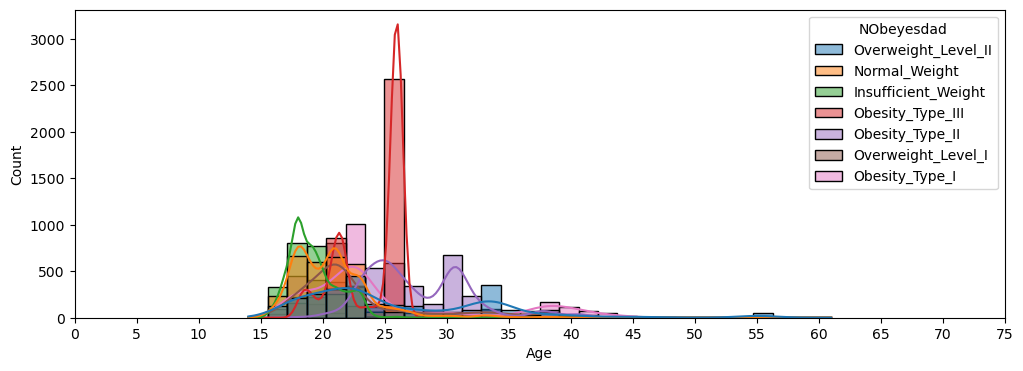

In [23]:
plt.figure(figsize=(12,4))
sns.histplot(data=train,x="Age",bins=30,hue="NObeyesdad",hue_order=category_order,kde=True)
plt.xticks(np.arange(0, 80, step=5))
plt.show()

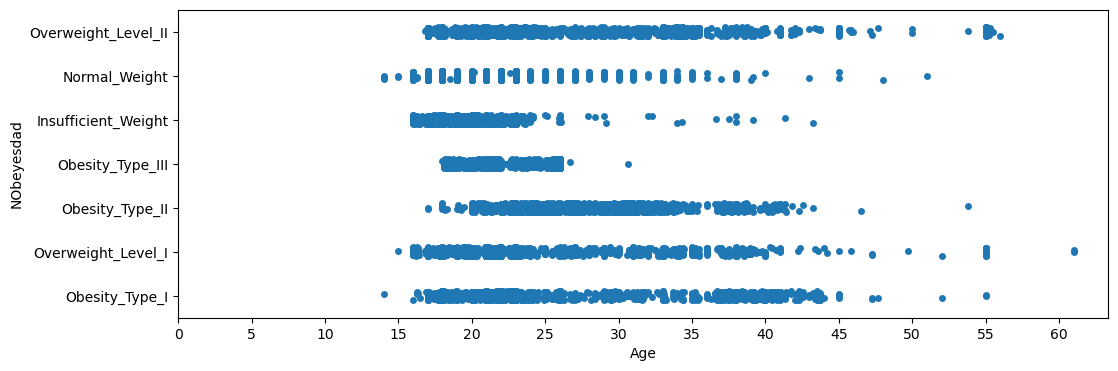

In [24]:
plt.figure(figsize=(12,4))
sns.stripplot(data=train,x='Age',y=train["NObeyesdad"])
plt.xticks(np.arange(0, 65, step=5))
plt.show()

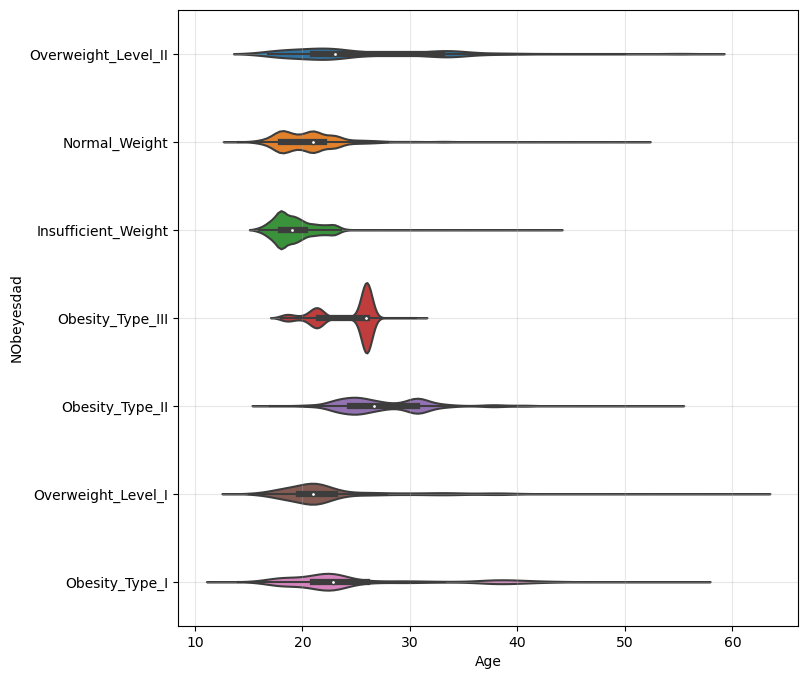

In [25]:
plt.figure(figsize=(8,8))
sns.violinplot(data=train, x='Age', y=train["NObeyesdad"])
plt.grid(alpha=0.3)

## MOST COMMON TYPE OF NOBEYESDAD

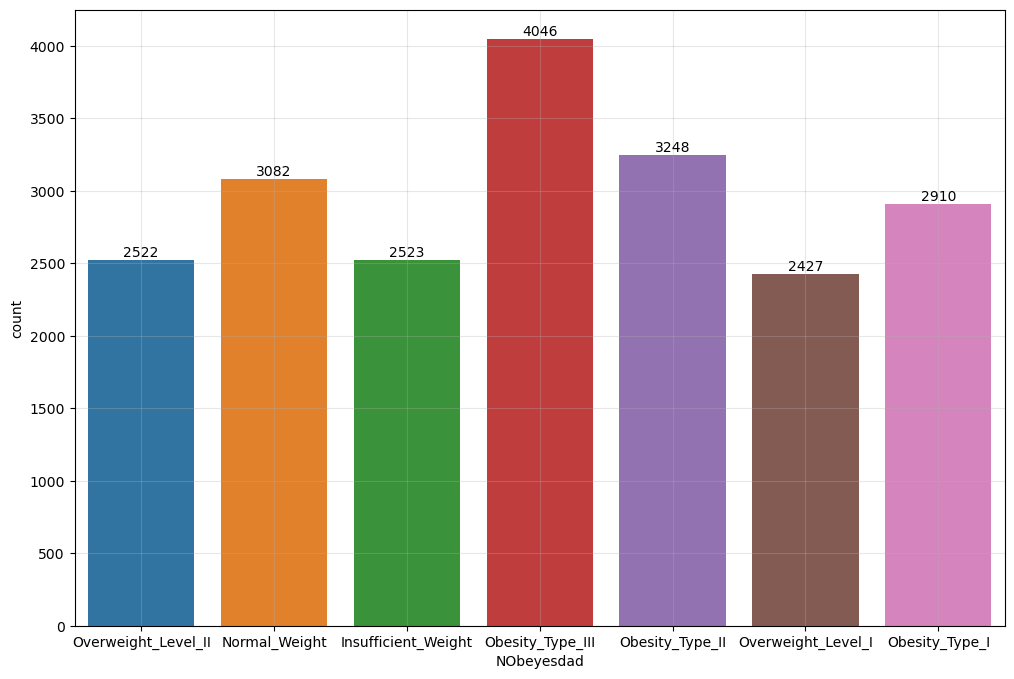

In [26]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="NObeyesdad",data=train)
for i in ax.containers:
    ax.bar_label(i,)
plt.grid(alpha=0.3)

## GENDER MOSTLY AFFECTED BY THIS NOBEYESDAD

### Which is most affected ?

In [27]:
train.groupby("Gender")["Age"].count()

Gender
Female    10422
Male      10336
Name: Age, dtype: int64

In [28]:
train.groupby("Gender")["NObeyesdad"].value_counts().to_frame()

count
Gender NObeyesdad                
Female Obesity_Type_III      4041
       Normal_Weight         1660
       Insufficient_Weight   1621
       Obesity_Type_I        1267
       Overweight_Level_I    1070
       Overweight_Level_II    755
       Obesity_Type_II          8
Male   Obesity_Type_II       3240
       Overweight_Level_II   1767
       Obesity_Type_I        1643
       Normal_Weight         1422
       Overweight_Level_I    1357
       Insufficient_Weight    902
       Obesity_Type_III         5

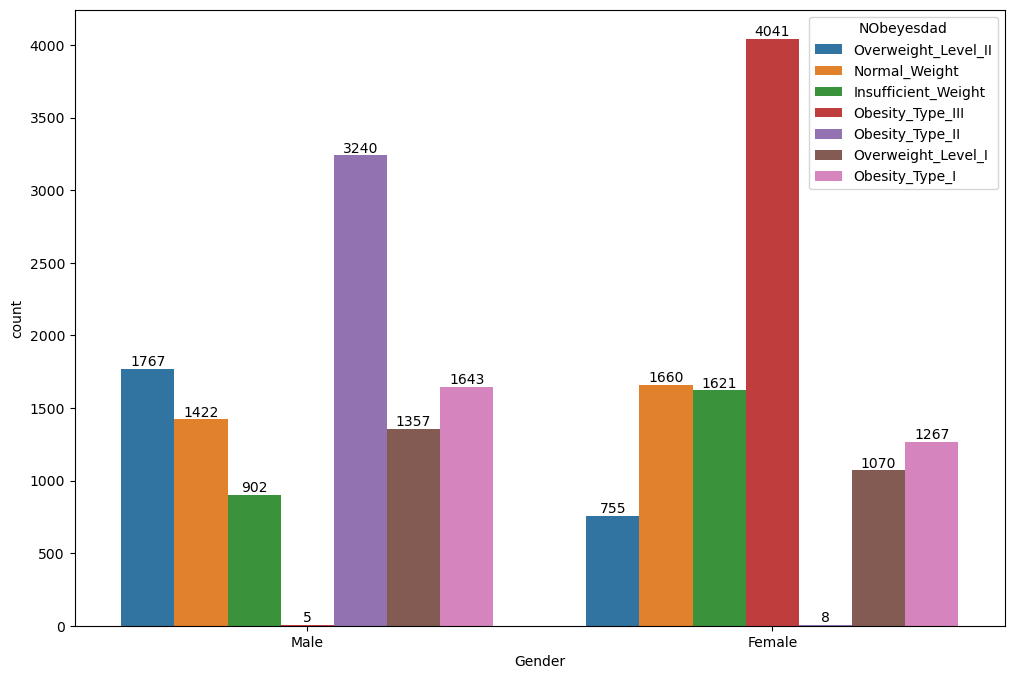

In [29]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Gender",hue="NObeyesdad",data=train,hue_order=category_order)
for i in ax.containers:
    ax.bar_label(i,)

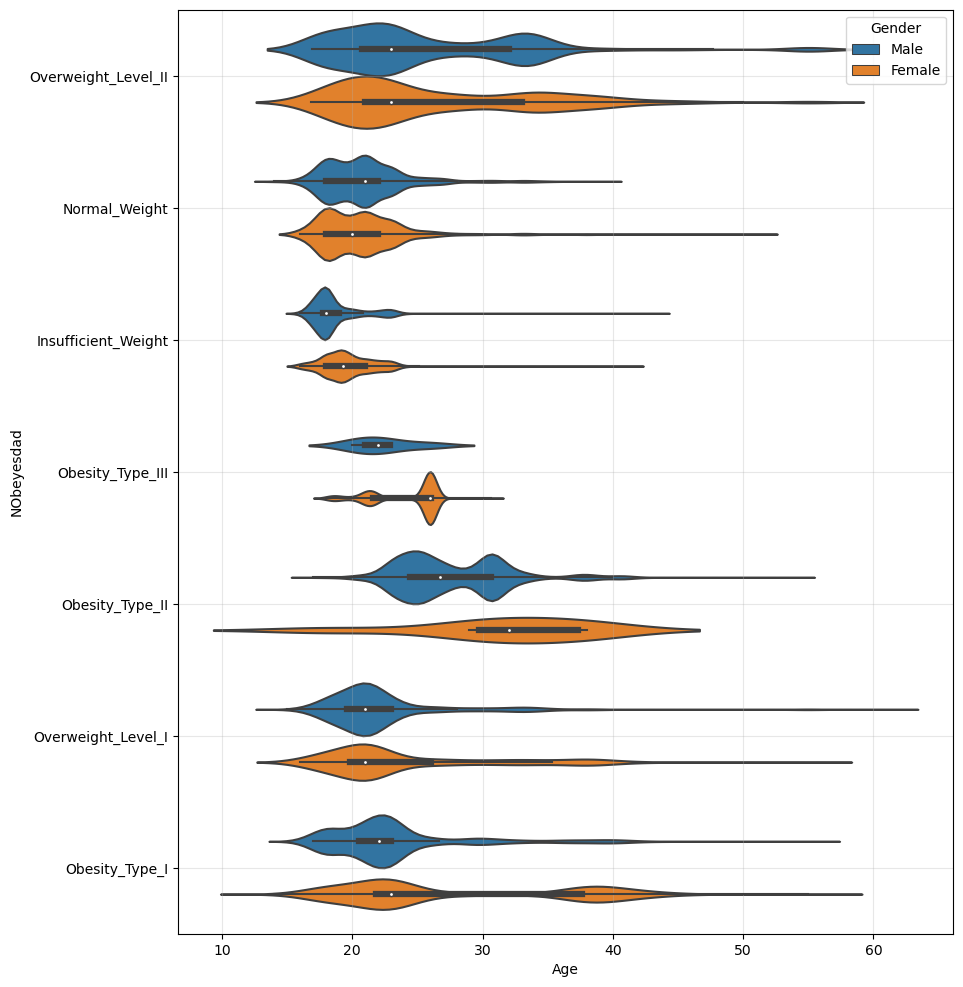

In [30]:
plt.figure(figsize=(10,12))
sns.violinplot(data=train, x='Age', hue='Gender', y=train["NObeyesdad"])
plt.grid(alpha=0.3)

## FAMILY HISTORY WITH OVERWT.

In [31]:
train.groupby("family_history_with_overweight")["Age"].count()

family_history_with_overweight
no      3744
yes    17014
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

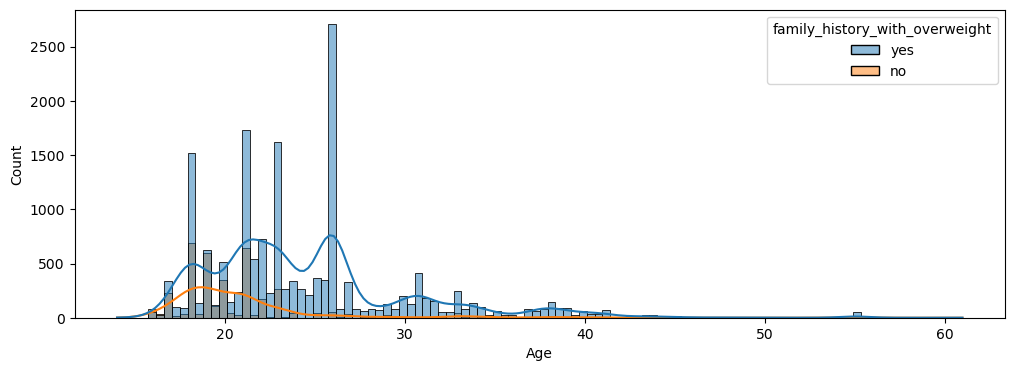

In [32]:
plt.figure(figsize=(12,4))
sns.histplot(data=train,x='Age', hue=train["family_history_with_overweight"],kde=True)

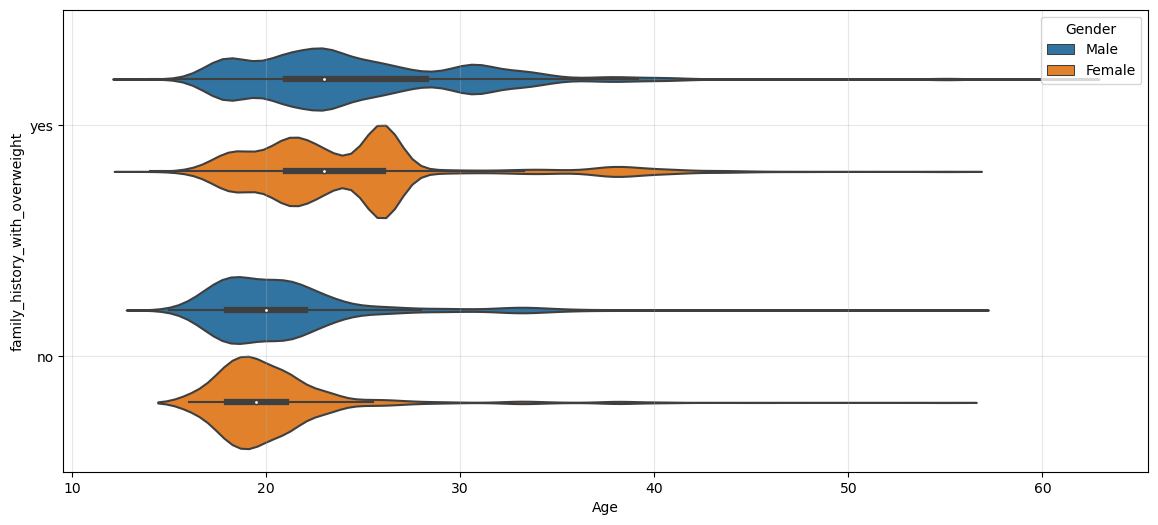

In [33]:
plt.figure(figsize=(14,6))
sns.violinplot(data=train, x='Age', hue='Gender', y=train["family_history_with_overweight"])
plt.grid(alpha=0.3)

In [34]:
train.groupby("SMOKE")["NObeyesdad"].value_counts().to_frame()

count
SMOKE NObeyesdad                
no    Obesity_Type_III      4042
      Obesity_Type_II       3134
      Normal_Weight         3036
      Obesity_Type_I        2886
      Insufficient_Weight   2516
      Overweight_Level_II   2497
      Overweight_Level_I    2402
yes   Obesity_Type_II        114
      Normal_Weight           46
      Overweight_Level_I      25
      Overweight_Level_II     25
      Obesity_Type_I          24
      Insufficient_Weight      7
      Obesity_Type_III         4

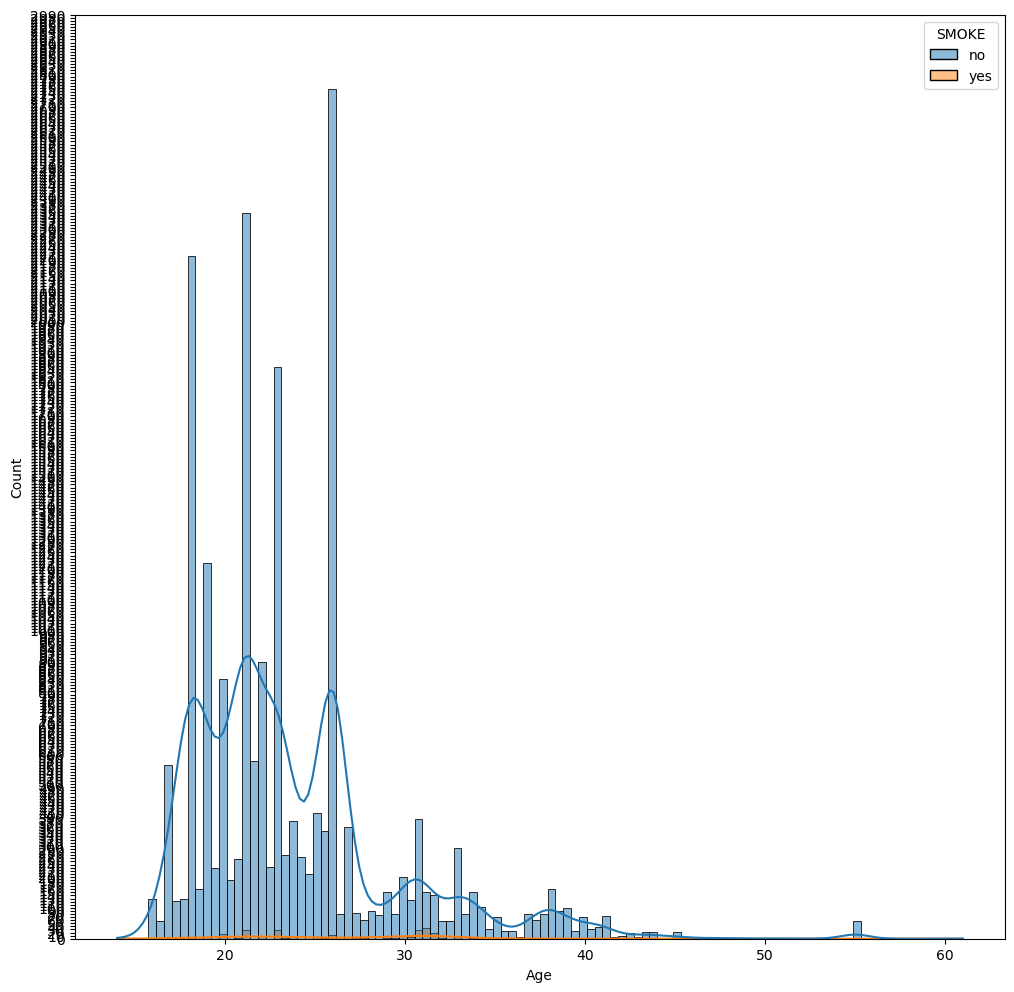

In [35]:
plt.figure(figsize=(12,12))
sns.histplot(data=train,x="Age",hue="SMOKE",kde=True)
plt.yticks(np.arange(0,3000,10))
plt.show()

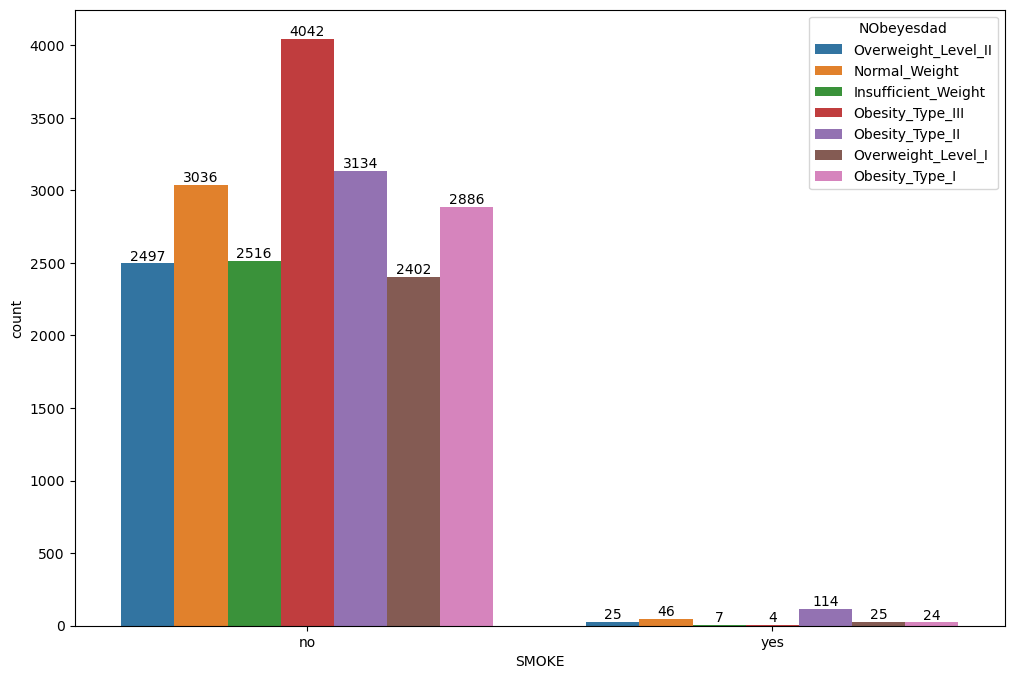

In [36]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="SMOKE",hue="NObeyesdad",data=train,hue_order=category_order)
for i in ax.containers:
    ax.bar_label(i,)

In [37]:
train["MTRANS"].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [38]:
xm=train.groupby("MTRANS")["NObeyesdad"].count()
xm.sort_values(ascending=False)

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: NObeyesdad, dtype: int64

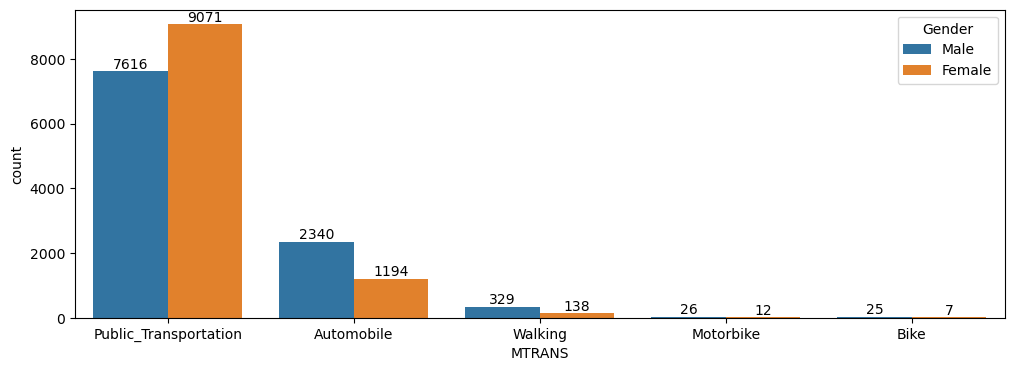

In [39]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=train,x="MTRANS",hue="Gender")
for i in ax.containers:
    ax.bar_label(i,)

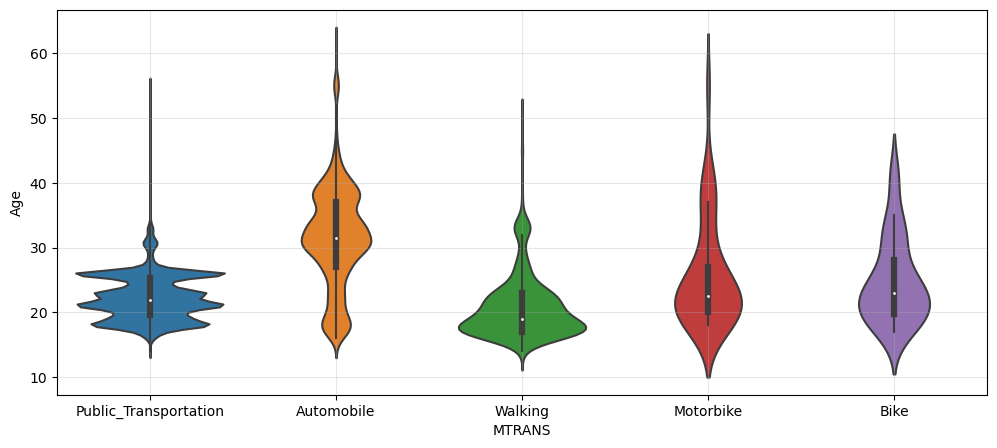

In [40]:
plt.figure(figsize=(12,5))
sns.violinplot(data=train,x="MTRANS",y="Age",orient="v")
plt.grid(alpha=0.3)

## CO-RELATION

In [41]:
train.corr(numeric_only=True).style.background_gradient(cmap="coolwarm")

In [42]:
corr=train.corr(numeric_only=True)

<Axes: >

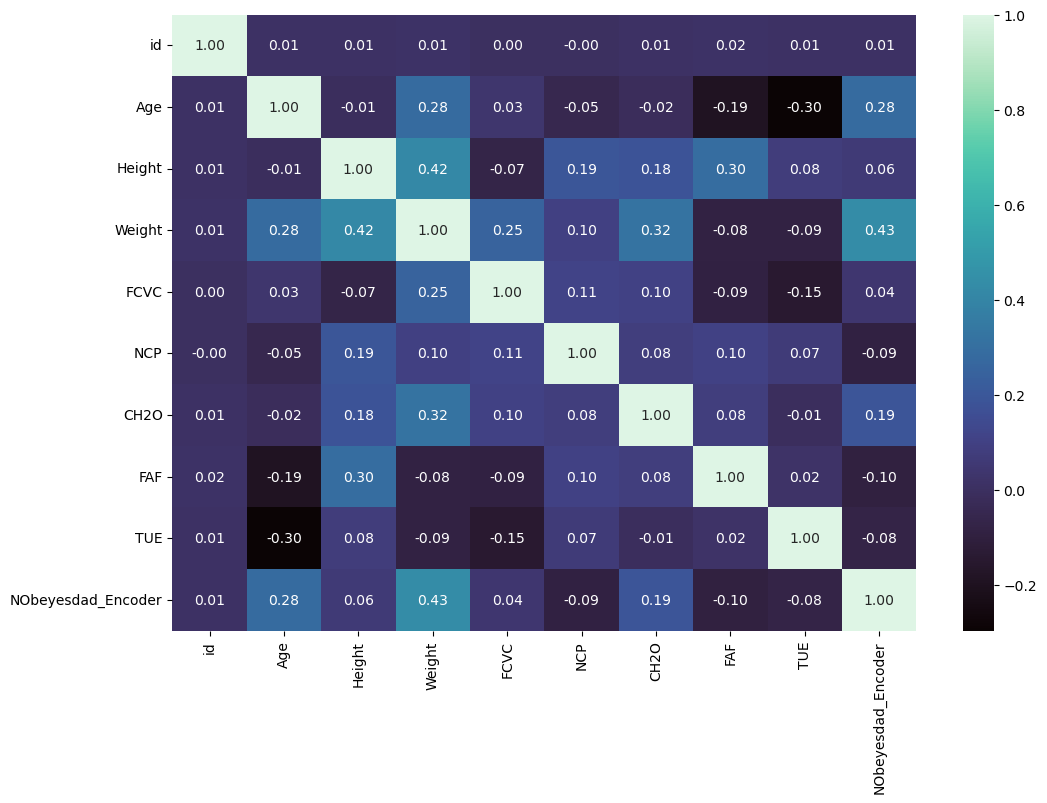

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="mako",fmt='.2f')

In [44]:
train.corrwith(train.NObeyesdad_Encoder,numeric_only=True).sort_values(ascending=False,key=(lambda x:abs(x)))

NObeyesdad_Encoder    1.000000
Weight                0.431821
Age                   0.283018
CH2O                  0.187100
FAF                  -0.096643
NCP                  -0.091154
TUE                  -0.076040
Height                0.060786
FCVC                  0.041076
id                    0.012329
dtype: float64

## Pre_processing 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
features=train.drop(["id","NObeyesdad_Encoder","NObeyesdad"],axis=1).copy()
labels=train["NObeyesdad"]

In [47]:
features.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [48]:
labels

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

In [49]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=42,test_size=0.2)

In [50]:
X_train.shape

(16606, 16)

In [51]:
X_test.shape

(4152, 16)

In [52]:
y_train.shape

(16606,)

In [53]:
y_test.shape

(4152,)

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16606 entries, 9958 to 15795
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          16606 non-null  object 
 1   Age                             16606 non-null  float64
 2   Height                          16606 non-null  float64
 3   Weight                          16606 non-null  float64
 4   family_history_with_overweight  16606 non-null  object 
 5   FAVC                            16606 non-null  object 
 6   FCVC                            16606 non-null  float64
 7   NCP                             16606 non-null  float64
 8   CAEC                            16606 non-null  object 
 9   SMOKE                           16606 non-null  object 
 10  CH2O                            16606 non-null  float64
 11  SCC                             16606 non-null  object 
 12  FAF                             16

In [55]:
X_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [56]:
num_data=['Age', 'Height', 'Weight','FCVC', 'NCP','CH2O', 'FAF', 'TUE',]
cat_data=['Gender','family_history_with_overweight','FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']

In [57]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer,OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score,roc_curve,roc_auc_score

In [58]:
pipe_num_val=make_pipeline(
    StandardScaler()
)
pipe_cat_val=make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

In [59]:
inner=ColumnTransformer([
    ("Num_val",pipe_num_val,num_data),
    ("cat_val",pipe_cat_val,cat_data)
])

In [60]:
pipeline=Pipeline([
    ("Pipeline",inner),
    ("model",RandomForestClassifier())
])
pipeline

Pipeline(steps=[('Pipeline',
                 ColumnTransformer(transformers=[('Num_val',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat_val',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('model', RandomForestClassifier())])

In [61]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Pipeline',
                 ColumnTransformer(transformers=[('Num_val',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat_val',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('model', RandomForestClassifier())])

In [62]:
y_hat=pipeline.predict(X_test)

In [63]:
print(classification_report(y_test, y_hat))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.93       524
      Normal_Weight       0.82      0.89      0.85       626
     Obesity_Type_I       0.88      0.85      0.86       543
    Obesity_Type_II       0.98      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.77      0.73      0.75       484
Overweight_Level_II       0.76      0.78      0.77       514

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



## Test data

In [64]:
new_df=test.copy()

In [65]:
temp=test["id"]

In [66]:
test=test.drop("id",axis=1)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

In [68]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

##### NO NULL VALUE PRESENT IN TESTS DATASET 

In [70]:
test.duplicated().sum()

0

In [73]:
y_hat=test_data=pipeline.predict(test)

In [80]:
y_hat

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [78]:
df_test_pred = df_test[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']]

In [82]:
# submitting file
rfc_prediction = pipeline.predict(test)

output = pd.DataFrame({'id': new_df.id, 'NObeyesdad':rfc_prediction})
output.to_csv('Multi-Class Prediction of Obesity Risk.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
